# Clase Tutorial 9: Clustering

## Introducción

* Los algoritmos de clustering agrupan automáticamente grupos de elementos en "clusters".
* Es un problema similar al de clasificación, en donde entrenamos un modelo para identificar regularidades que caracterizan a distintas categorías dentro de los datos. 

    🤔 Entonces... ¿cuál es la diferencia?

    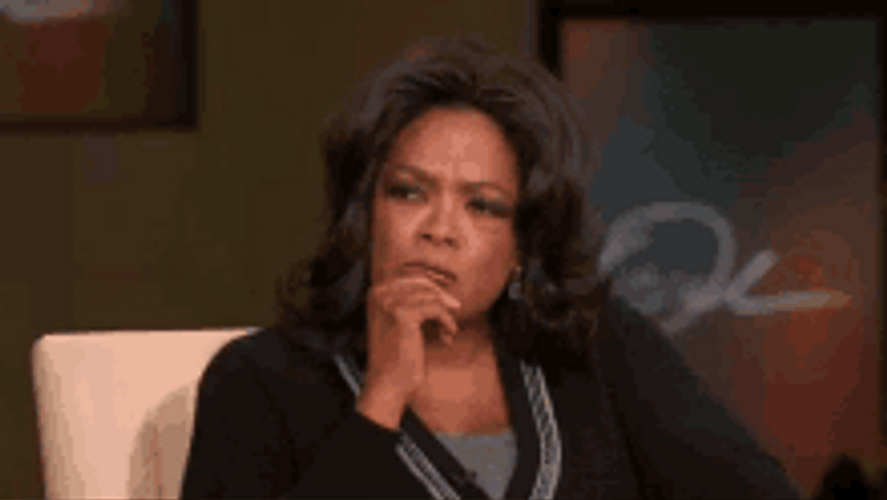

* Clustering es un problema <span style="color: orange;">**no supervisado**</span>.
    * 🤷🏽 No conocemos <span style="color: orange;">*cuál</span> es el grupo* al que pertenece cada dato.
    * 🤷🏽 No conocemos <span style="color: orange;">*cuántos</span> grupos* distintos hay.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/10_Clase_10: Clustering/img/clustering_classification.png">

* El objetivo de un algoritmo de clustering es que cada cluster sea <span style="color: orange;">internamente coherente</span> pero diferente a los demás clusters. 

* Es una técnica que se utiliza más allá del simple agrupamiento de datos, ya que se emplea ampliamente para:
    * Comprender los datos y realizar una exploración inicial.
    * Mejorar los resultados de un modelo predictivo.
    * Optimizar algoritmos.

## **1. k-Means**

- K-means es uno de los algoritmos más famosos para la identificación de clusters, por su simplicidad y eficiencia. 
- En este algoritmo, cada punto en el espacio de las features será asignado a uno de <span style="color: orange;">k clusters</span>, en donde k es un hiperparámetro del modelo que se fija a priori. 
- El criterio para agrupar los datos es por su cercanía a ciertos puntos en el espacio llamados <span style="color: orange;">centroides</span>. 

En su versión más simple, el algoritmo funciona de la siguiente manera:


>    1. Se eligen k puntos en el espacio (semillas de cada k-cluster), que serán los centroides iniciales.
>
>    2. Se etiqueta cada punto del dataset con el número de centroide más cercano, definiendo así k-clusters.
>
>    3. Se redefinen los centroides como los centros geométricos de los puntos dentro de cada cluster. Dicho de otra forma, la posición nueva de cada centroide es el promedio de las posiciones de los puntos asignados al cluster.
>
>    4. Se repiten los pasos 2-3 hasta que el algoritmo converge, es decir, hasta que la composición de los clusters no cambia.

De esta manera, el algoritmo busca minimizar una función de costo que es la suma de las distancias al cuadrado de los puntos al centroide de su cluster, es decir, <span style="color: orange;">la varianza dentro de cada cluster</span>:

$$
J=\sum_{j=1}^k \sum_{x \in S_j} \vert\vert x - \mu_j \vert\vert^2
$$ 
en donde $\mu_j$ es el centroide del cluster $S_j$.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/10_Clase_10: Clustering/img/kmeans.gif">

* Podemos observar que las fronteras de decisión son rectas.

### **Problema de inicialización en k-means**

- Los puntos k iniciales se pueden inicializar de forma aleatoria, pero es <span style="color: orange;">muy sensible a estas semillas iniciales</span>.
    - Dado suficiente tiempo, k-means siempre va a converger. Sin embargo, puede converger a un mínimo local. 
    - Esto depende en gran medida de la inicialización de los centroides. 
- Existen algunos métodos para elegir los puntos iniciales de forma que el problema converga más rápido.
- Por ejemplo, [KMeans de scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) incluye los siguientes parámetros:
    - `n_init`: vuelve a ejecutar el algoritmo con n inicializaciones diferentes y devuelve la mejor salida (medida por la suma de cuadrados dentro del cluster a.k.a `inertia`).

        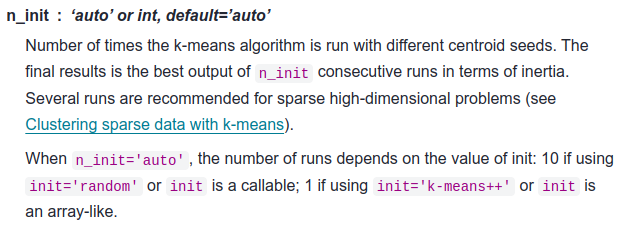
    - `init`: define el método de inicialización de los centroides. Si se establece como `kmeans++`, inicializa los centroides para que estén generalmente distantes entre sí, lo que probablemente conduzca a resultados mejores que la inicialización aleatoria.

        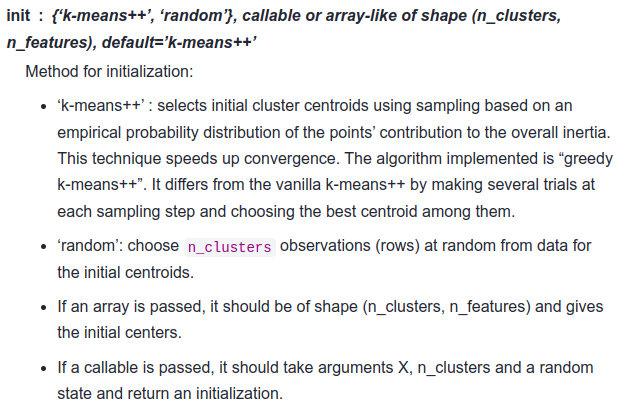
    

#### **¿Cómo funciona k-means++?**

- K-means++ es una mejora sobre el algoritmo tradicional de k-means para seleccionar de manera más inteligente los centroides iniciales. 
- Esto aumenta las probabilidades de obtener una mejor solución final y evita que el algoritmo quede atrapado en mínimos locales. 


> 1. Seleccionar un **punto aleatorio** del conjunto de datos como el primer centroide.
> 2. Para cada punto en el conjunto de datos, calcular la **distancia al centroide más cercano** que ya fue seleccionado.
> 3. Seleccionar los siguientes centroides de manera probabilística:
>    - Elegir el siguiente centroide de forma aleatoria, pero con una **probabilidad proporcional al cuadrado de la distancia** de cada punto al centroide más cercano.
>    - Los puntos más alejados de los centroides existentes tienen mayor probabilidad de ser seleccionados.
>    - La probabilidad de que un punto $x_i$ sea seleccionado como centroide es:
>      $$P(x_i) = \frac{D(x_i)^2}{\sum_{j} D(x_j)^2}$$
>      donde $D(x_i)$ es la distancia de $x_i$ al centroide más cercano.
> 4. Repetir hasta seleccionar los **k centroides** iniciales.
> 5. Aplicar el algoritmo K-means estándar.


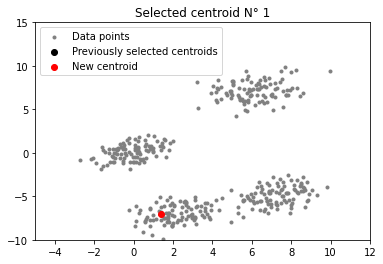

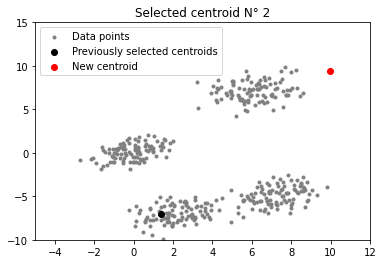

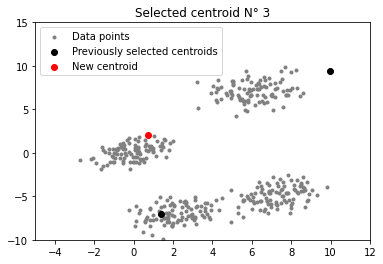

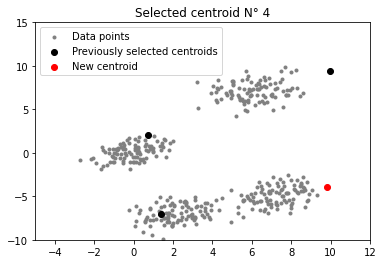

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], 
                   [0.5, 1]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)


def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.',
                color='gray', label='Data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color='black', label='Previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color='red', label='New centroid')
    plt.title('Selected centroid N°% d' % (centroids.shape[0]))
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()


def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2)) # euclidean distance

def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters 
    '''
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    plot(data, np.array(centroids))

    # Compute remaining k - 1 centroids
    for c_id in range(k - 1):

        # initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids

centroids = initialize(data, k=4)

### **Elección de k en k-means**

- En algunos problemas uno conoce a priori el número de clusters que busca. 
    - Por ejemplo, si queremos identificar tumores malignos/benignos dadas sus características morfológicas. 

- En otros casos el k lo determinamos para satisfacer algún criterio externo a los datos. 
    - Por ejemplo, necesitamos generar k grupos de sujetos lo más homogéneos posibles en cada grupo para participar de un experimento. 

- Pero una condición más general se da cuando uno debe determinar el valor de k a partir de la propia estructura de los datos. 

Veremos a continuación algunas estrategias para elegir el valor de k y evaluar la "calidad" del clustering.

#### **1. Método de "ganancias decrecientes":**

- Podríamos usar como métrica la suma de las distancias cuadráticas de los puntos a sus centroides. Esto constituiría una medida de error, ya que uno desearía que los puntos estén cerca del centroide de su cluster.
    - El atributo `inertia_` del modelo de sklearn tiene dicha suma de distancias cuadráticas a los centroides. Veamos cómo varía con k:


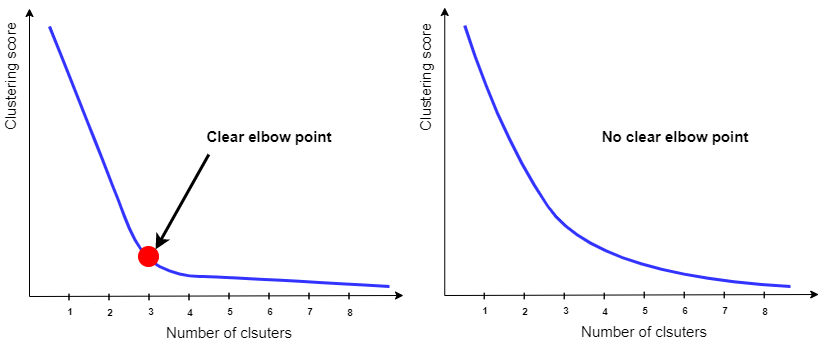

#### 2. Silhouette score

- El **Silhouette Score** es una métrica que evalúa la calidad de la agrupación de un conjunto de datos. 
- Mide cuán cercano está un punto a otros puntos dentro del mismo cluster en comparación con los puntos del cluster más cercano. 
- Para cada punto $x_i$, se calcula un coeficiente $s_{x_i}$ que se define como:

$$
s_{x_i}=\frac{b(x_i)-a(x_i)}{max\{a(x_i),b(x_i)\}}
$$
- En donde:
    - $a(x_i)$ es la distancia promedio entre el punto $x_i$ y todos los demás puntos **dentro de su propio cluster** (cohesión).
    - $b(x_i)$ es la distancia promedio entre el punto $x_i$ y todos los puntos **en el cluster vecino más cercano** (separación).

**Interpretación del Silhouette Score:**
- El coeficiente $s_{x_i}$ puede tomar valores en el rango $[-1, 1]$:
  - **Si $s_{x_i}$ está cerca de 1**: El punto $x_i$ está correctamente agrupado en su cluster.
  - **Si $s_{x_i}$  está cerca de 0**: El punto $x_i$ está en el límite entre dos clusters, indicando que podría pertenecer a cualquiera de ellos.
  - **Si $s_{x_i}$  está cerca de -1**: El punto $x_i$ está mal agrupado y pertenece al cluster vecino.


**Score global del clustering:**
- Para obtener un score que represente la calidad del clustering en todo el conjunto de datos, se puede promediar los coeficientes de silueta de todos los puntos:

    $$ S(C)=\frac{1}{k}\sum_{j=1}^k \bar{s}_j $$

    donde $\bar{s}_j$ es el coeficiente promedio de todos los puntos dentro del $j$-ésimo cluster, y $k$ es el número total de clusters. 
    
- Un Silhouette Score alto sugiere una buena separación y cohesión entre los clusters, mientras que un score bajo indica que los clusters no están bien definidos.

- Si graficamos obtenemos algo del estilo:

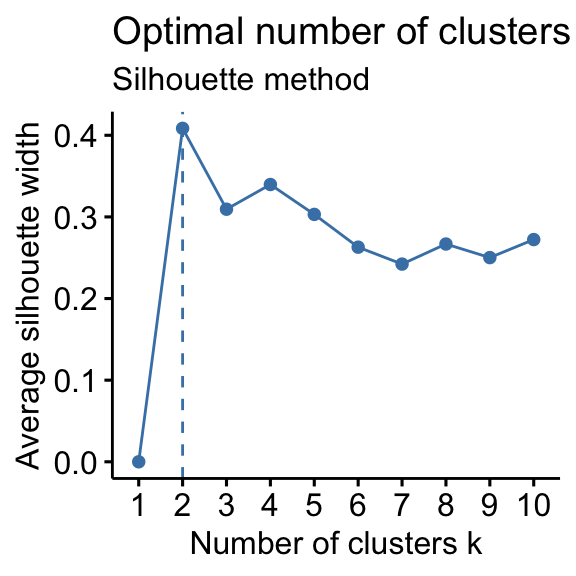

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

dataset2 = datasets.make_moons(n_samples=1000, noise=0.07, random_state=19)[0]

def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2', title_=''):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.suptitle(title_,fontsize=16)
    fig.set_size_inches(12, 6)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

In [ ]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=2).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)

cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2, title_= "K-means Clustering")

- Estos dos datasets ilustran las fortalezas y debilidades del k-means. 

- El algoritmo busca e identifica clusters globulares (esencialmente esféricos). 

- Si esta suposición no se cumple, la salida del modelo puede ser inadecuada (o simplemente muy mala). 

- Pero no termina ahí: k-means también puede performar mal con clusters de diferentes tamaños y densidades:

In [ ]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset1, kmeans_dataset2,title1='', title2='', title_="K-means Clustering: Same dataset, different densities")

### **Conclusiones de k-means**

- A pesar de todas sus fallas, la popularidad perdurable de k-means (y algoritmos relacionados) se debe a su versatilidad. 
- Su complejidad promedio es $O(knT)$, donde k, n y T son el número de clusters, muestras e iteraciones, respectivamente. Por lo tanto, se considera uno de los algoritmos de clustering más rápidos disponibles.

## **2. Expectation Maximization**

- Esta técnica es la aplicación del algoritmo general de Expectation-Maximization (EM) a la tarea de clustering. 
- Está conceptualmente relacionada y es visualmente similar a k-means. 
- Mientras que k-means busca minimizar la distancia entre las observaciones y sus centroides asignados, EM estima algunas variables latentes (típicamente la media y la matriz de covarianza de una distribución normal multinomial (**Modelos de Mezcla Gaussiana (GMM)**) de manera de maximizar la log-verosimilitud de los datos observados. 
- Similar a k-means, el algoritmo converge al clustering final mejorando iterativamente su rendimiento (es decir, reduciendo la log-verosimilitud). 
- Sin embargo, (nuevamente como k-means) no hay garantía de que el algoritmo haya llegado al mínimo global en lugar del mínimo local (una preocupación que aumenta en dimensiones superiores).
- Si la distribución subyacente se identifica correctamente (por ejemplo, distribución normal), entonces el algoritmo funciona bien. 
- En la práctica, especialmente para conjuntos de datos grandes, puede que la distribución subyacente no sea recuperable, por lo que el clustering con EM puede no ser adecuado para tales tareas.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/em_only.gif">


- En k-means no se tiene en cuenta la varianza. En 2d, la varianza determina la forma de la distribución:

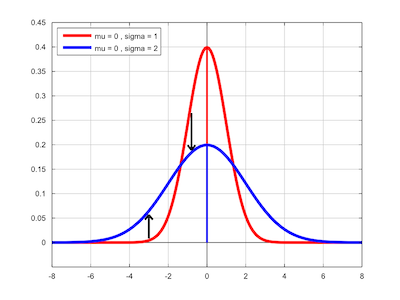

- k-means agrega una esfera (o círculo, en 2d) centrada con radio definido por el punto más distante a cada cluster:

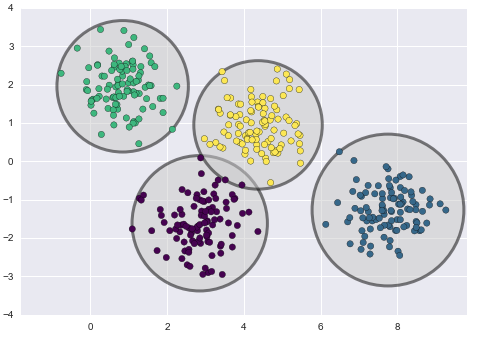

- Esto funciona genial cuando nuestra data tiene forma esférica. Sin embargo, cuando la data toma una forma diferente pueden pasar cosas de este estilo:

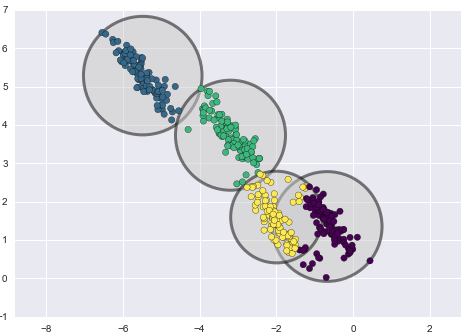

- En contraste, GMM puede manejar mejor este tipo de clusters:

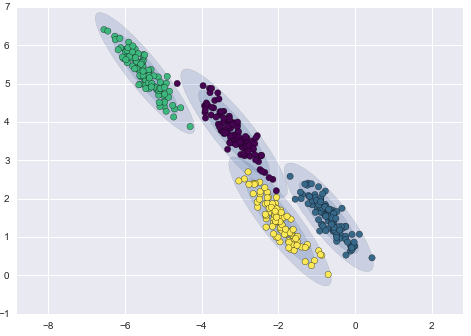

- K-means realiza una clasificación estricta, mientras que GMM realiza una clasificación suave.
    - En k-means, cada punto se asigna de manera determinista a uno y solo un grupo, pero en realidad puede haber superposiciones entre los grupos. 
    - GMM nos proporciona las probabilidades de que el punto de datos pertenezca a cada uno de los posibles clusters.

### **Modelos de Mezclas Gaussianas**
- Un modelo de mezcla gaussiana implica la mezcla (es decir, superposición) de múltiples distribuciones gaussianas. 
- Aquí, en lugar de identificar grupos por centroides "más cercanos", ajustamos un conjunto de k gaussianas a los datos, y estimamos parámetros de distribución gaussiana como la **media**, **varianza** y el **peso** de un grupo. 
- Después de conocer los parámetros para cada punto de datos, podemos calcular las probabilidades de que pertenezca a cada uno de los grupos.

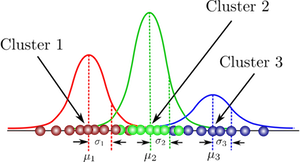

- Cada distribución se multiplica por un peso $π(π_1+π_2+π_3)=1$ para tener en cuenta el hecho de que no tenemos el mismo número de muestras de cada categoría. 
    - Ejemplo: es posible que solo hayamos incluido 1000 personas de la clase del grupo rojo y 100000 personas de la clase del grupo verde.

### **Expectation Maximization**

**Expectation**

- El primer paso, conocido como el paso de esperanza o paso E.
- Consiste en calcular la esperanza de las asignaciones del componente $C_k$ para cada punto de datos $x_i \in X$ dado los parámetros del modelo $π_k$, $μ_k$ y $σ_k$.

**Maximization**

- El segundo paso es conocido como el paso de maximización o paso M.
- Consiste en maximizar las esperanzas calculadas en el paso E con respecto a los parámetros del modelo. 
- Es decir, consiste en actualizar los valores de $π_k$, $μ_k$ y $σ_k$.

***
- Todo el proceso iterativo se repite hasta que el algoritmo converge, dando una estimación de máxima verosimilitud. 
- De manera intuitiva, el algoritmo funciona porque conocer la asignación de componente $C_k$ para cada $x_i$ facilita resolver para $π_k$, $μ_k$ y $σ_k$, mientras que conocer $π_k$, $μ_k$ y $σ_k$ facilita inferir $p(C_k|x_i)$. 
- El paso E corresponde al último caso, mientras que el paso de M corresponde al primero. 
    - Por lo tanto, alternando entre qué valores se suponen fijos o conocidos, se pueden calcular de manera eficiente estimaciones de máxima verosimilitud de los valores no fijos.

In [ ]:
em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(dataset2)

cluster_plots(dataset1, dataset2, em_dataset1.predict(dataset1),  em_dataset2.predict(dataset2))

- EM agrupa muy bien al primer dataset porque la data esta normalmente distribuida.
- El dataset 2 no puede ser modelado adecuadamente como una GMM, por lo tanto EM no performa bien.

In [ ]:
from matplotlib.patches import Ellipse

em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(dataset2)

def cluster_plots_gmm(set1, set2, gmm_model1, gmm_model2, title1='', title2='', title_=''):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title_, fontsize=16)
    fig.set_size_inches(12, 6)
    ax1.set_title(title1, fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1], s=8, lw=0, c=gmm_model1.predict(set1))
    for i in range(gmm_model1.n_components):
        plot_gmm_ellipse(ax1, gmm_model1.means_[i], gmm_model1.covariances_[i])
    
    ax2.set_title(title2, fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1], s=8, lw=0, c=gmm_model2.predict(set2))
    for i in range(gmm_model2.n_components):
        plot_gmm_ellipse(ax2, gmm_model2.means_[i], gmm_model2.covariances_[i])
    
    fig.tight_layout()
    plt.show()

def plot_gmm_ellipse(ax, mean, cov):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ell = Ellipse(xy=mean, width=width, height=height, angle=angle, color='blue', alpha=0.3)
    ax.add_patch(ell)


cluster_plots_gmm(dataset1, dataset2, em_dataset1, em_dataset2, title1='Dataset 1', title2='Dataset 2', title_='Clusters with GMM Ellipsoids')

## **3. Hierarchical Clustering (HC)**

- Suele generar soluciones bastante buenas.
- A diferencia de k-means y EM, el clustering jerárquico (HC) no requiere que el usuario especifique el número de clusters de antemano. 
- En vez, HC devuelve un resultado (generalmente como un dendrograma), a partir del cual el usuario puede decidir el número apropiado de clusters (ya sea manual o algorítmicamente): 
    - Si se hace manualmente, el usuario puede cortar el **dendrograma** donde los clusters fusionados están demasiado separados (representados por líneas largas en el dendrograma). 
    - Alternativamente, el usuario puede simplemente devolver un número específico de clusters (similar a k-means).
- Esto nos da un entendimiento muy interesante sobre como funciona el conjunto de datos.

- HC típicamente viene en dos variantes (básicamente, de abajo hacia arriba o de arriba hacia abajo):
    - Divisivo (HDC): Comienza con el conjunto de datos completo que comprende un solo cluster que se divide iterativamente, un punto a la vez, hasta que cada punto forma su propio cluster.
    - **Aglomerativo** (HAC): El método aglomerativo es en reversa (bottom-up): los puntos individuales se combinan iterativamente hasta que todos los puntos pertenecen al mismo cluster.

### **Algoritmo HAC:**
1. Partimos de que cada punto es un cluster (n puntos = n clusters).
2. En cada paso, unimos los dos clusters **más cercanos**.
3. Repetir hasta que haya un único cluster u obtegamos una cantidad específica de clusters.
    - Anotando las distancias a las cuales unimos los clusters podemos armar un dendograma.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/hierarch.gif">

### 🤔 **¿Cómo definimos cuales son los clusters más cercanos?**
- **Enlace simple**: distancia mínima entre dos puntos de cada cluster. 
    - Con: puede generar clusters muy finitos. Agrega puntos que estan cerca del borde, no necesariamente del resto del cluster. Genera zonas menos densas porque los agrega localmente.

- **Enlace completo**: opuesto al simple. En vez de tomar la distancia mínima,toma la máxima. 
    - Es mas global que el simple, evita generar zonas poco densas.

- **Enlace del centroide**: se mide como la distancia euclidiana entre los centroides de los dos clústeres.
    - El centroide de un clúster es el punto medio de todos los puntos en ese clúster.

- **Enlace promedio**: se mide como el promedio de todas las distancias entre pares de puntos, donde cada punto proviene de diferentes clústeres. 

- **Enlace de Ward**: busca el par de clústeres que genere el mínimo aumento en la varianza total dentro del clúster después de fusionarse.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/linkage.png" height=300>

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/hierarch_1.gif">

In [ ]:
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, metric='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', 
                                              linkage='ward').fit_predict(dataset2)

cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

Probemos los diferentes tipos de enlaces/linkage para ver si mejoramos la clusterización en el dataset 2:

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, linkage_method in enumerate(['ward', 'complete', 'average', 'single']):
    hc_result = cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage=linkage_method).fit_predict(dataset2)
    ax = axes[i // 2, i % 2]
    ax.scatter(dataset2[:, 0], dataset2[:, 1], c=hc_result, cmap='viridis', s=10)
    ax.set_title(f'Linkage: {linkage_method.capitalize()}')

plt.tight_layout()
plt.show()

- En clustering jerárquico no se necesita la posición de cada observación, sino la distancia entre cada punto (por ejemplo, una matriz $n x n$). 
- Sin embargo, la principal desventaja del HC es que requiere demasiada memoria para datasets grandes (esa matriz $n x n$ crece bastante rápido). 
- El clustering divisivo es $O(2^n)$, mientras que el clustering aglomerativo es algo mejor en $O(n^2 log(n))$ (aunque existen casos especiales de $O(n^2)$ para el clustering aglomerativo de enlace único y máximo).

## **4. DBSCAN (Density Based Spatial Clustering of Applications with Noise)**

* Permite separar grupos de alta densidad de los de baja densidad.
* Clustering espacial basado en **densidad**, para aplicaciones que tienen **ruido**. 

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/clustering_dataset.png">

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/clustering_dataset_kmeans_hdbscan.png">



Nota: Si quieren jugar con este dataset, pueden accederlo [aquí](https://github.com/lmcinnes/hdbscan/blob/master/notebooks/clusterable_data.npy).

* Permite definir que algunos puntos no estén asociados a ningún cluster (**ruido** o outliers).
    * Los clusters que se obtienen son "más robustos".

* DBSCAN tiene un concepto diferente de cluster que k-means: dice que un cluster debe ser un grupo **denso**.

    * 🤔 ¿Qué es la densidad?
        * En física: cantidad de masa que hay en un determinado volumen.
        * Aquí es lo mismo: 
            * Masa ~ cantidad de puntos
            * Volumen ~ bola del vecindario en en el hiperespacio.
    
    * 🤔 ¿Como definimos si un punto pertenece a una región densa?
        
        `Un punto pertenece a una región densa si y sólo si hay más de k puntos (incluyendo al punto) con distancias menor a ε del punto.`
        * Si miro un vecindario de radio ε y encuentro k puntos (incluyendo al punto), entonces es una zona densa. 
        * 2 hiperparámetros: *k* (*MinPts*) y *ε*.

        * Importante: La cantidad de clusters **no** es un hiperparámetro (estamos buscando zonas densas).

Se definen 3 tipos de puntos:
* **Puntos core**: tienen al menos *k/MinPts* en su vecindad.
* **Puntos border**: puntos que están dentro del radio de un punto core, pero ellos no cumplen la condición de core. Son las fronteras de los clusters.
* **Puntos noise**: puntos que no cumplen la condición de core ni de border. Son outliers, o ruido, y no pertenecen a ningún cluster.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/dbscan.png">

#### Procedimiento:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/DBSCAN_tutorial.gif">

* Puede agrupar datos en clusters de cualquier forma, siempre y cuando se mantenga la densidad. (A diferencia de k-means, que separa con rectas.)

### 👍 Ventajas de DBSCAN

* No es necesario definir el número de clusters a priori.

* Permite encontrar clusters con forma arbitraria, no necesariamente con geometría esférica.

* Al incluir la noción de ruido, DBSCAN es más robusto ante la presencia de outliers.

* Tiene sólo dos hiperparámetros, fáciles de interpretar, que se pueden definir a priori en base a conocimientos del dominio de los datos.

### 👎 Desventajas de DBSCAN

* No es totalmente determinista: los puntos-borde que están a distancia menor a ε de más de un cluster podrían cambiar de etiqueta dependiendo del orden en que se procesan los datos, lo que significa que diferentes ejecuciones pueden devolver diferentes resultados.

* Sensibilidad a los parámetros: si no se conocen bien los datos y su escala, puede ser dificil determinar $\epsilon$. 
    * En 2d es más facil, mediante prueba y error. Por ejemplo:
    
    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/DBSCAN_search.gif">

* La performance disminuye en casos en donde la densidad de puntos varía mucho según la región ya que no se pueden ajustar los parámetros minPts y $\epsilon$ adecuadamente para todos los clusters.

* Como es plano (no jerárquico), no puede encontrar clusters más densos dentro de otros más grandes.


In [ ]:
dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='') # noise points are assigned -1

dbscan_dataset2 = cluster.DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit_predict(dataset2)
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2, title_="DBSCAN Clustering")

Existen variantes de DBSCAN que intentan solventar estas falencias.

* GDBSCAN (Generalized DBSCAN): los parámetros ε y minPts son eliminados del algoritmo original y movidos a los predicados.

* OPTICS (Ordering Points To Identify the Clustering Structure): encuentra muestras centrales de alta densidad y expande clusters a partir de ellas. A diferencia de DBSCAN, mantiene la jerarquía de clusters para un radio de vecindario variable. Más adecuado para su uso en conjuntos de datos grandes que la implementación actual de DBSCAN en sklearn.

* HDBSCAN (Heirarchical DBSCAN): versión jerárquica de DBSCAN que también es más rápida que OPTICS, a partir de la cual se puede extraer una partición plana consistente en los clusters más prominentes de la jerarquía. Si quieren una buena explicación más detallada, recomiendo leer [este link](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html).

## 🧑‍💻 Comparación de algoritmos de clustering

Este ejemplo muestra características de diferentes algoritmos de clustering en datasets que son "interesantes" pero aún en 2D. Con la excepción del último conjunto de datos, los parámetros de cada uno de estos pares de conjunto de datos y algoritmo se han ajustado para producir buenos resultados de clustering. Algunos algoritmos son más sensibles a los valores de los parámetros que otros.

El último conjunto de datos es un ejemplo de una situación "nula" para la agrupación: los datos son homogéneos y no existe una buena agrupación. Para este ejemplo, el conjunto de datos nulo utiliza los mismos parámetros que el conjunto de datos de la fila superior, lo que representa una falta de coincidencia en los valores de los parámetros y la estructura de datos.

Si bien estos ejemplos dan cierta intuición sobre los algoritmos, es posible que esta intuición no se aplique a datos de muy altas dimensiones.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Generate datasets
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

plt.figure(figsize=(15, 10))

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
titles = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'No Structure', 'Anisotropic', 'Varied Variances']

for i, dataset in enumerate(datasets, start=1):
    plt.subplot(2, 3, i)
    plt.title(titles[i - 1])
    X, _ = dataset
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)

plt.tight_layout()
plt.show()

In [ ]:
import time
import warnings
from sklearn import datasets
from itertools import cycle, islice
from sklearn.neighbors import kneighbors_graph

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    kmeans = cluster.KMeans(
    n_clusters=params["n_clusters"], random_state=params["random_state"], n_init=10
    )   
    hac_ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    hac_single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single", connectivity=connectivity
    )
    hac_complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete", connectivity=connectivity
    )
    hac_avg = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average", connectivity=connectivity
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("KMeans", kmeans),
        ("Gaussian\nMixture", gmm),
        ("HAC \nLinkage: Single", hac_single),
        ("HAC \nLinkage: Ward", hac_ward),
        ("HAC \nLinkage: Maximum", hac_complete),
        ("HAC \nLinkage: Average", hac_avg),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()